In [1]:
import pandas as pd

In [30]:
options_df = pd.read_csv("data/options/GME-volume-processed.csv")

options_df.head()

,Trade Date,Volume
0,2019-10-01,6003
1,2019-10-02,6538
2,2019-10-03,690
3,2019-10-04,1758
4,2019-10-07,1346


In [31]:
options_df["Volume"].describe()

count       506.000000
mean      31795.294466
std       58352.348430
min         333.000000
25%        4028.250000
50%       12695.500000
75%       32257.500000
max      677918.000000
Name: Volume, dtype: float64

In [32]:
# options_df["normalized-volume"] = (options_df["Volume"] - options_df["Volume"].min() )/ (options_df
#                                                           ["Volume"].max() - options_df["Volume"].min())

options_df["normalized-volume"] = (options_df["Volume"] - options_df["Volume"].mean() )/ (options_df
                                                          ["Volume"].std())

options_df["normalized-volume"].describe()

count    5.060000e+02
mean    -2.808469e-17
std      1.000000e+00
min     -5.391779e-01
25%     -4.758514e-01
50%     -3.273184e-01
75%      7.920941e-03
max      1.107278e+01
Name: normalized-volume, dtype: float64

<AxesSubplot:ylabel='Frequency'>

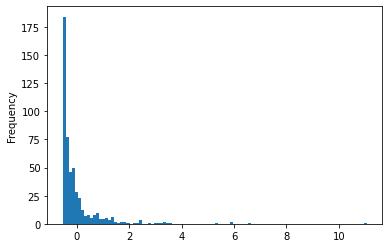

In [33]:
options_df["normalized-volume"].plot.hist(bins=100)

In [34]:
emoji_df = pd.read_csv("processed_data/emoji-counts.csv")

emoji_df.head()

,date,ox,teddy_bear,rocket,full_moon,new_moon_face,rainbowbear,bear,gem_stonepalms_up_together,raising_hands,...,roll_of_paperpalms_up_together,poultry_leg,gorilla,flexed_biceps,high_voltage,clown_face,chart_increasing,smiling_face_with_hearts,smiling_face_with_heart-eyes,hundred_points
0,2019-10-22,0,1,0,0,1,0,18,0,4,...,0,0,0,2,0,1,1,2,1,0
1,2019-10-23,0,0,9,0,0,0,9,0,0,...,0,0,0,1,0,0,1,0,0,2
2,2019-10-24,3,0,12,0,0,0,26,0,0,...,0,0,0,0,0,3,0,0,0,9
3,2019-10-25,0,0,10,0,0,0,11,0,2,...,0,0,0,2,0,2,3,0,0,3
4,2019-10-28,0,0,4,0,4,0,9,0,0,...,0,0,0,0,0,4,2,0,0,1


In [35]:
options_emoji_df = options_df.merge(emoji_df, left_on="Trade Date", right_on="date")

options_emoji_df.head()

corr = options_emoji_df.corr()

corr

,Volume,normalized-volume,ox,teddy_bear,rocket,full_moon,new_moon_face,rainbowbear,bear,gem_stonepalms_up_together,...,roll_of_paperpalms_up_together,poultry_leg,gorilla,flexed_biceps,high_voltage,clown_face,chart_increasing,smiling_face_with_hearts,smiling_face_with_heart-eyes,hundred_points
Volume,1.000000,1.000000,-0.068083,-0.039282,0.731445,0.178001,0.348785,-0.011083,-0.155602,0.281219,...,0.093797,0.032649,0.444766,0.105789,0.007951,0.093888,0.265190,-0.026199,0.090609,-0.022469
normalized-volume,1.000000,1.000000,-0.068083,-0.039282,0.731445,0.178001,0.348785,-0.011083,-0.155602,0.281219,...,0.093797,0.032649,0.444766,0.105789,0.007951,0.093888,0.265190,-0.026199,0.090609,-0.022469
ox,-0.068083,-0.068083,1.000000,-0.004227,-0.048512,-0.032384,0.017560,0.109099,0.063175,-0.027142,...,-0.023954,-0.022256,-0.057737,0.011961,-0.007161,-0.052392,0.016065,0.101980,-0.022767,0.000059
teddy_bear,-0.039282,-0.039282,-0.004227,1.000000,-0.072802,-0.023586,0.008728,-0.042022,0.455201,-0.030514,...,-0.023262,-0.017613,-0.025497,-0.063892,0.092842,-0.054206,-0.054902,-0.002344,-0.016561,0.010784
rocket,0.731445,0.731445,-0.048512,-0.072802,1.000000,0.163583,0.470888,0.026933,-0.119633,0.407491,...,0.118748,-0.000738,0.539922,0.223904,0.014141,-0.026675,0.300350,0.022981,0.141187,0.048997
full_moon,0.178001,0.178001,-0.032384,-0.023586,0.163583,1.000000,-0.002445,-0.035260,-0.031753,0.185661,...,0.162006,0.076012,0.234857,0.014982,-0.000762,-0.070181,0.040717,-0.038528,-0.015519,-0.005938
new_moon_face,0.348785,0.348785,0.017560,0.008728,0.470888,-0.002445,1.000000,0.109955,-0.029804,0.165544,...,0.216887,-0.038448,0.097202,0.012220,0.012016,0.018855,0.224966,-0.010766,0.259596,-0.022365
rainbowbear,-0.011083,-0.011083,0.109099,-0.042022,0.026933,-0.035260,0.109955,1.000000,0.046672,0.010840,...,0.030126,-0.027418,-0.054210,-0.027428,0.024261,0.051570,-0.021036,0.022589,0.059995,-0.039721
bear,-0.155602,-0.155602,0.063175,0.455201,-0.119633,-0.031753,-0.029804,0.046672,1.000000,-0.010654,...,-0.024842,-0.022055,-0.094725,-0.057228,-0.021827,-0.131042,-0.083382,-0.040771,-0.025401,0.031719
gem_stonepalms_up_together,0.281219,0.281219,-0.027142,-0.030514,0.407491,0.185661,0.165544,0.010840,-0.010654,1.000000,...,0.127171,0.006197,0.411139,0.184128,-0.007258,-0.098008,0.021919,-0.029300,0.020985,-0.031180
